In [73]:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

[autoreload of experiments.inferred failed: Traceback (most recent call last):
  File "/nfs/home/bsparks/.conda/envs/poetry/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/nfs/home/bsparks/.conda/envs/poetry/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/nfs/home/bsparks/.conda/envs/poetry/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py", line 192
    def t

In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
%autoreload

In [76]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [77]:
import scripts
print(scripts.__path__)
import pathlib


from scripts.common.schemas import TypeCollectionCategory
from scripts.infer.structure import DatasetFolderStructure

dataset = DatasetFolderStructure(pathlib.Path(
    "/nfs/data/students/bsparks/mdti4py-dataset-pool/cdt4py"
))
assert dataset.dataset_root.is_dir(), f"{dataset.dataset_root} not a directory!"

print(dataset)

['/nfs/home/bsparks/mdti4py/scripts/scripts']
CrossDomainTypes4Py @ /nfs/data/students/bsparks/mdti4py-dataset-pool/cdt4py


In [78]:
import importlib
import experiments.inferred

In [79]:
artifact_root = pathlib.Path("/nfs/home/bsparks/mdti4py/datasets")
assert artifact_root.is_dir(), f"Cannot find {artifact_root=}"

# Ground Truth

In [81]:
importlib.reload(experiments.inferred)
groundtruth = experiments.inferred.load_groundtruths(artifact_root, dataset).replace("<MISSING>", pd.NA)

/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/zwicker-group__numpy-py-pde/extended_ground_truth.csv: 100%|█| 
/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/zwicker-group__numpy-py-pde/context.csv: 100%|█| 1551/1551 [00:


In [82]:
%matplotlib agg
importlib.reload(experiments.predictions)
thres_figs, (ax1, ax2, ax3) = plt.subplots(nrows=3)

# Type4Py

In [83]:
from experiments import pipeline, inferred

In [85]:
type4py_inferred = inferred.load_entire_inferred(
    artifact_root, dataset, tool_name="type4pyN1", task="all"
)
type4py_adjusted = pipeline.factory(
    tool="type4pyN1", 
    groundtruth=groundtruth, 
    inferred=type4py_inferred, 
    form="adjusted"
)
type4py_base = pipeline.factory(
    tool="type4pyN1",
    groundtruth=groundtruth,
    inferred=type4py_inferred,
    form="base"
)

/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/zwicker-group__numpy-py-pde/type4pyN1/all/inferred.csv: 100%|█|


Loaded 1541 inference artifacts
Initial prediction size: (1171690, 8)
Deriving limited form


100%|███████████████████████████████████████████████████████████████████| 1171690/1171690 [00:09<00:00, 121186.85it/s]


Deriving adjusted form from limited form


100%|███████████████████████████████████████████████████████████████████| 1171690/1171690 [00:09<00:00, 127620.59it/s]


Size after joining predictions to groundtruth: (1054456, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


Reduced to evaluatable: (228305, 12)
Deriving limited form


100%|███████████████████████████████████████████████████████████████████| 1171690/1171690 [00:09<00:00, 119466.09it/s]


Deriving adjusted form from limited form


100%|███████████████████████████████████████████████████████████████████| 1171690/1171690 [00:09<00:00, 126705.81it/s]


Deriving base form from adjusted form


100%|███████████████████████████████████████████████████████████████████| 1171690/1171690 [00:09<00:00, 126651.30it/s]


(1054456, 12)
Reduced to evaluatable: (228305, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


In [87]:
importlib.reload(experiments.predictions)
type4py_base_ubiq = experiments.predictions.ubiquitous_types(type4py_base)

ax1.set_title('Type4Py')
co_occurrences(type4py_base_ubiq, truth="gt_anno", pred="anno", threshold=0.06, figsize=(5, 10), ax=ax1)

# Typilus

In [88]:
typilus_inferred = inferred.load_entire_inferred(
    artifact_root, dataset, tool_name="typilusN1", task="all"
)
typilus_adjusted = pipeline.factory(
    tool="typilusN1", 
    groundtruth=groundtruth, 
    inferred=typilus_inferred, 
    form="adjusted"
)
typilus_base = pipeline.factory(
    tool="typilusN1",
    groundtruth=groundtruth,
    inferred=typilus_inferred,
    form="base"
)

/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/zwicker-group__numpy-py-pde/typilusN1/all/inferred.csv: 100%|█|


Loaded 1544 inference artifacts
Initial prediction size: (1171654, 8)
Deriving limited form


100%|███████████████████████████████████████████████████████████████████| 1171654/1171654 [00:09<00:00, 120081.73it/s]


Deriving adjusted form from limited form


100%|███████████████████████████████████████████████████████████████████| 1171654/1171654 [00:10<00:00, 116073.46it/s]


Size after joining predictions to groundtruth: (1054456, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


Reduced to evaluatable: (228305, 12)
Deriving limited form


100%|███████████████████████████████████████████████████████████████████| 1171654/1171654 [00:09<00:00, 117220.40it/s]


Deriving adjusted form from limited form


100%|███████████████████████████████████████████████████████████████████| 1171654/1171654 [00:10<00:00, 116911.51it/s]


Deriving base form from adjusted form


100%|███████████████████████████████████████████████████████████████████| 1171654/1171654 [00:09<00:00, 119513.23it/s]


(1054456, 12)
Reduced to evaluatable: (228305, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


In [89]:
importlib.reload(experiments.predictions)
typilus_base_ubiq = experiments.predictions.ubiquitous_types(typilus_base)

ax2.set_title('Typilus')
co_occurrences(typilus_base_ubiq, truth="gt_anno", pred="anno", threshold=0.06, figsize=(5, 10), ax=ax2)

# TypeT5

In [101]:
typet5_inferred = inferred.load_entire_inferred(
    artifact_root, dataset, tool_name="TypeT5TopN1", task="all"
)
typet5_adjusted = pipeline.factory(
    tool="TypeT5TopN1",
    groundtruth=groundtruth,
    inferred=typet5_inferred,
    form="adjusted"
)
typet5_base = pipeline.factory(
    tool="TypeT5TopN1",
    groundtruth=groundtruth,
    inferred=typet5_inferred,
    form="base"
)

/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/zwicker-group__numpy-py-pde/TypeT5TopN1/all/inferred.csv: 100%|


Loaded 1425 inference artifacts
Initial prediction size: (1115283, 8)
Deriving limited form


100%|███████████████████████████████████████████████████████████████████| 1115283/1115283 [00:05<00:00, 218826.09it/s]


Deriving adjusted form from limited form


100%|███████████████████████████████████████████████████████████████████| 1115283/1115283 [00:05<00:00, 213925.50it/s]


Size after joining predictions to groundtruth: (584530, 12)
Reduced to evaluatable: (206369, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


Deriving limited form


100%|███████████████████████████████████████████████████████████████████| 1115283/1115283 [00:05<00:00, 220407.53it/s]


Deriving adjusted form from limited form


100%|███████████████████████████████████████████████████████████████████| 1115283/1115283 [00:05<00:00, 214228.78it/s]


Deriving base form from adjusted form


100%|███████████████████████████████████████████████████████████████████| 1115283/1115283 [00:05<00:00, 215975.36it/s]


(584530, 12)
Reduced to evaluatable: (206369, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


In [102]:
typet5_base_ubiq = experiments.predictions.ubiquitous_types(typet5_base)

ax3.set_title('TypeT5')
experiments.predictions.co_occurrences(
    typet5_base_ubiq, 
    truth="gt_anno", pred="anno", 
    threshold=0.06, figsize=(5, 10), ax=ax3
)

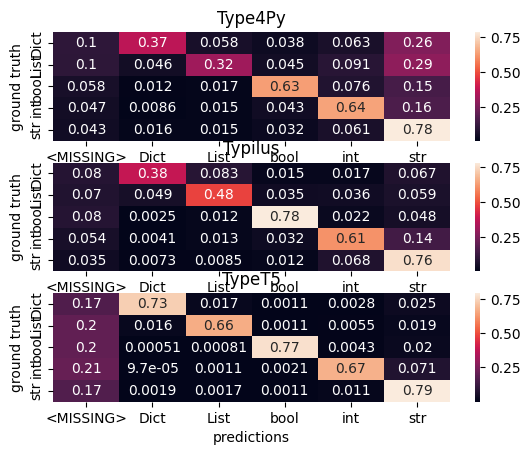

<Figure size 500x1000 with 0 Axes>

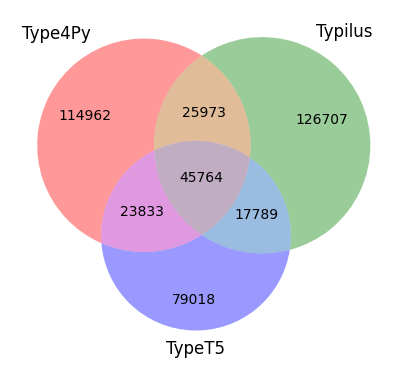

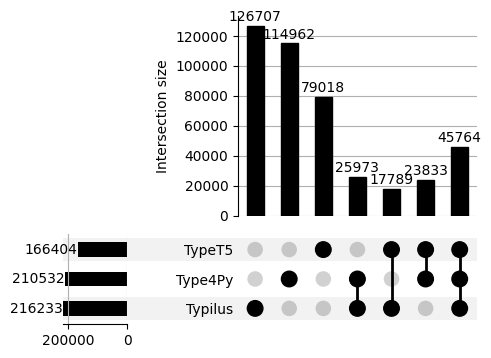

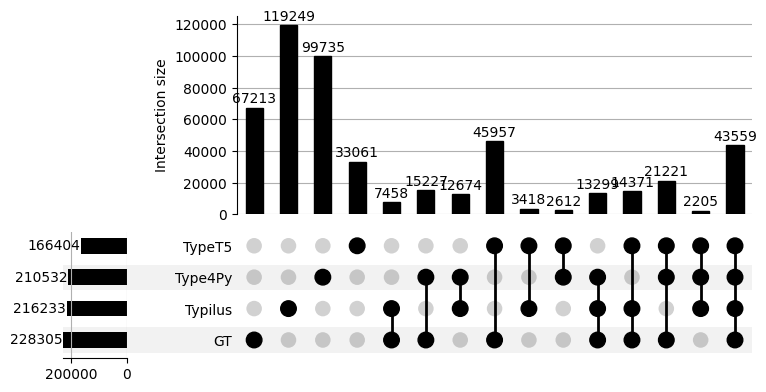

<Figure size 500x1000 with 0 Axes>

In [103]:
%matplotlib inline
plt.tight_layout()
plt.show()

# Overlap: Capture per symbol diversity

In [104]:
!pip install matplotlib-venn
from matplotlib_venn import venn3

In [105]:
ignore = ["gt_anno", "topn", "method"]

common_predictions = type4py_adjusted.drop(columns=ignore).merge(
    typilus_adjusted.drop(columns=ignore), 
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"], 
    suffixes=("_type4py", "_typilus")
).merge(
    typet5_adjusted.drop(columns=ignore).rename(columns={"anno": "anno_typet5"}),
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"]
)

common_predictions = pd.merge(
    left=common_predictions,
    right=groundtruth,
    how="left",
    on=["repository", "category", "file", "qname", "qname_ssa"],
).replace("<MISSING>", pd.NA).dropna(subset=["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"], how="all", axis=0)
    
#display(common_predictions["adjusted_anno"].value_counts())
common_predictions[["anno_type4py", "anno_typilus", "anno_typet5"]] = common_predictions[["anno_type4py", "anno_typilus", "anno_typet5"]]#.fillna("<MISSING>")
common_predictions[["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

,adjusted_anno,anno_type4py,anno_typilus,anno_typet5
0,str,str,str,str
1,bool,bool,bool,bool
2,bool,bool,bool,bool
3,str,str,str,str
4,str,str,str,str
...,...,...,...,...
228300,Callable,int,IValueInfoProto,Callable
228301,Boundaries,str,IntrospectionInterpreter,PolarGrid
228302,Callable,<NA>,Tensor,<NA>
228303,Boundaries,int,PreregistrationUser,PolarGrid


In [106]:
!pip install upsetplot
import upsetplot

In [123]:
aligned = pd.DataFrame()
for relevant in ["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]:
    aligned[relevant] = common_predictions.index.astype("string") + common_predictions[relevant].fillna(pd.NA)

aligned[["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

,adjusted_anno,anno_type4py,anno_typilus,anno_typet5
0,0str,0str,0str,0str
1,1bool,1bool,1bool,1bool
2,2bool,2bool,2bool,2bool
3,3str,3str,3str,3str
4,4str,4str,4str,4str
...,...,...,...,...
228300,228300Callable,228300int,228300IValueInfoProto,228300Callable
228301,228301Boundaries,228301str,228301IntrospectionInterpreter,228301PolarGrid
228302,228302Callable,<NA>,228302Tensor,<NA>
228303,228303Boundaries,228303int,228303PreregistrationUser,228303PolarGrid


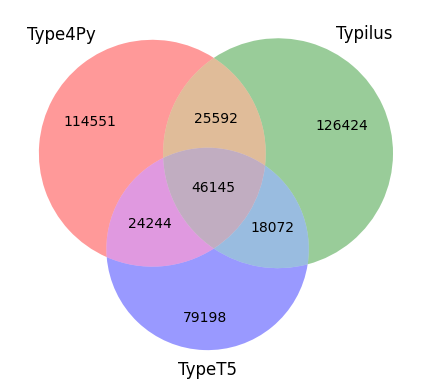

In [124]:
venn3(
    (set(aligned["anno_type4py"].tolist()), set(aligned["anno_typilus"].tolist()), set(aligned["anno_typet5"].tolist())),
    set_labels=('Type4Py', 'Typilus', 'TypeT5'),
)

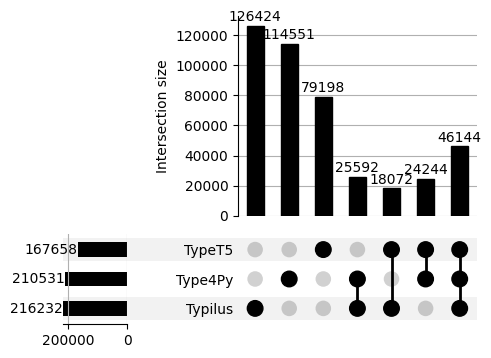

In [130]:
relevant = aligned[["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

gt_anno, type4py, typilus, typet5 = relevant.T.to_dict("records")

contents = {
    #"ground_truth": set(gt_anno.values()),
    "Typilus": set(typilus.values()).difference({None, pd.NA}),
    "Type4Py": set(type4py.values()).difference({None, pd.NA}),
    "TypeT5": set(typet5.values()).difference({None, pd.NA}),
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

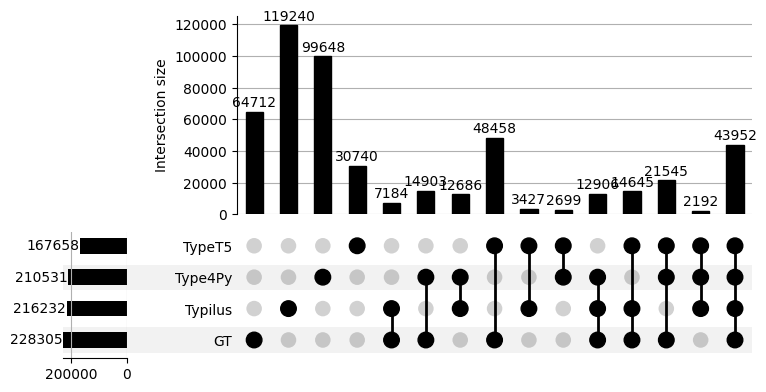

In [126]:
relevant = aligned[["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]
gt_anno, type4py, typilus, typet5 = relevant.T.to_dict("records")

contents = {
    "GT": set(gt_anno.values()).difference({None, pd.NA}),
    "Typilus": set(typilus.values()).difference({None, pd.NA}),
    "Type4Py": set(type4py.values()).difference({None, pd.NA}),
    "TypeT5": set(typet5.values()).difference({None, pd.NA}),
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

In [127]:
# Investigate types not predicted by any model:
missed_entirely = common_predictions[
    (common_predictions["anno_typet5"] != common_predictions["adjusted_anno"]) &
    (common_predictions["anno_type4py"] != common_predictions["adjusted_anno"]) &
    (common_predictions["anno_typilus"] != common_predictions["adjusted_anno"])
]
missed_entirely[["repository", "file", "qname_ssa", "adjusted_anno","anno_typet5", "anno_type4py", "anno_typilus"]]

,repository,file,qname_ssa,adjusted_anno,anno_typet5,anno_type4py,anno_typilus
44,0hoo__flask-snowball,db.py,Stock.per,float,int,int,int
46,0hoo__flask-snowball,db.py,Stock.roes,List[Tuple],List[YEAR_STAT],int,int
47,0hoo__flask-snowball,db.py,Stock.pbrs,List[Tuple],List[YEAR_STAT],str,int
48,0hoo__flask-snowball,db.py,Stock.pers,List[Tuple],List[YEAR_STAT],str,str
49,0hoo__flask-snowball,db.py,Stock.epss,List[Tuple],List[YEAR_STAT],str,int
...,...,...,...,...,...,...,...
228297,zwicker-group__numpy-py-pde,pde/grids/operators/polar.py,make_divergence.bcs,Boundaries,PolarGrid,bool,IntrospectionInterpreter
228299,zwicker-group__numpy-py-pde,pde/grids/operators/polar.py,make_vector_gradient.bcs,Boundaries,PolarGrid,str,IntrospectionInterpreter
228301,zwicker-group__numpy-py-pde,pde/grids/operators/polar.py,make_tensor_divergence.bcs,Boundaries,PolarGrid,str,IntrospectionInterpreter
228302,zwicker-group__numpy-py-pde,pde/grids/operators/polar.py,make_poisson_solver,Callable,<NA>,<NA>,Tensor


In [128]:
missed_entirely["adjusted_anno"].value_counts()

adjusted_anno
str                                 2641
int                                 2475
float                               2112
Dict                                2104
List                                2024
                                    ... 
TCPStore                               1
List[ElicitationRecord]                1
Union[SAONegotiator, Collection]       1
Union[List, float]                     1
Tuple[Q, str]                          1
Name: count, Length: 10320, dtype: int64

In [129]:
for anno in ["type4py", "typilus", "typet5"]:
    print(missed_entirely[["adjusted_anno", f"anno_{anno}"]].value_counts())

adjusted_anno      anno_type4py   
int                str                940
float              int                821
Dict               str                779
List               str                717
str                int                552
                                     ... 
List[BoundingBox]  Iterator[Tuple]      1
                   List                 1
                   int                  1
List[Break]        Dict[str, Any]       1
yaml               str                  1
Name: count, Length: 19349, dtype: int64
adjusted_anno       anno_typilus       
float               int                    874
int                 str                    792
str                 int                    503
List                List[str]              418
Dict                Dict[str, Any]         294
                                          ... 
LanguageIdentifier  CanonicalIdentifier      1
LanguageDTO         List[Token]              1
                    EntityLike               1